In [87]:
# Extract the data from Yahoo Finance
import yfinance as yf
company = ['AAPL','AMZN','GOOG','INTC','ORCL','XOM','CVX','COP','HES','OXY']
data = yf.download(company, start = '2012-01-01', end = '2021-12-31')['Close']
data

[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,COP,CVX,GOOG,HES,INTC,ORCL,OXY,XOM
Date,,,,,,,,,,
2012-01-03,12.375391,8.951500,35.882206,64.416763,16.513794,48.014309,16.959806,21.361286,62.498016,50.896351
2012-01-04,12.441895,8.875500,35.712891,64.305870,16.585020,48.507603,17.353737,21.485193,62.685608,50.908184
2012-01-05,12.580026,8.880500,35.427467,63.675549,16.354961,47.356579,17.554155,21.964291,62.187607,50.754326
2012-01-06,12.711536,9.130500,35.151695,63.214466,16.131853,46.386421,17.450489,22.245138,61.941814,50.375557
2012-01-09,12.691377,8.928000,35.287159,63.903156,15.447884,46.781067,17.602535,22.377604,62.692085,50.600456
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,173.248459,171.068497,62.912247,102.512215,146.615692,70.724266,47.588306,85.610214,27.823370,54.395348
2021-12-27,177.228821,169.669495,64.697350,104.608070,147.533890,72.764481,48.172600,85.438446,28.585257,55.170891
2021-12-28,176.206696,170.660995,64.617836,104.405533,145.923676,72.446892,48.005661,84.589218,28.430950,54.992603


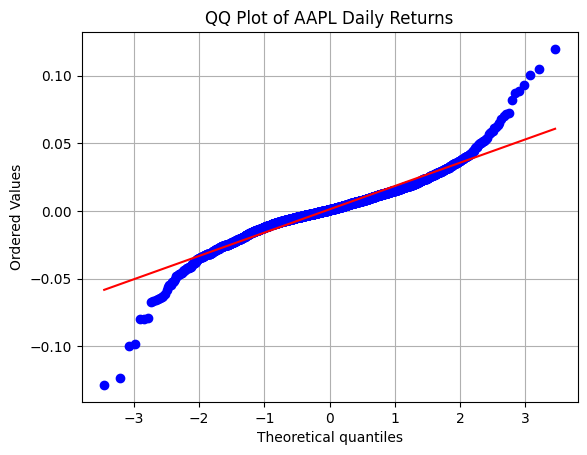

The returns are not normally distributed


1.3156746136266576e-32

In [88]:
# Q1
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate daily returns for AAPL
aapl_returns = data['AAPL'].pct_change().dropna()

# Normality Test by using QQ Plot
stats.probplot(aapl_returns, dist="norm", plot=plt)
plt.title('QQ Plot of AAPL Daily Returns')
plt.grid(True)
plt.show()

# Normality Test by using Shapiro-Wilk test
test_stat, p_value = stats.shapiro(aapl_returns)

if p_value < 0.05:
  print("The returns are not normally distributed")
else:
  print("The returns are normally distributed")
p_value

In [89]:
# Q2
# Import library for DF Test
from statsmodels.tsa.stattools import adfuller
aapl_prices = data['AAPL'].dropna()
df_result = adfuller(aapl_prices, regression='c', maxlag=0, autolag=None)

# Obtain p value
p_value = df_result[1]

print("p-value: {:.4f}".format(p_value))
if p_value < 0.05:
  print("The price series is stationary")
else:
  print("The price series is not stationary")



p-value: 0.9991
The price series is not stationary


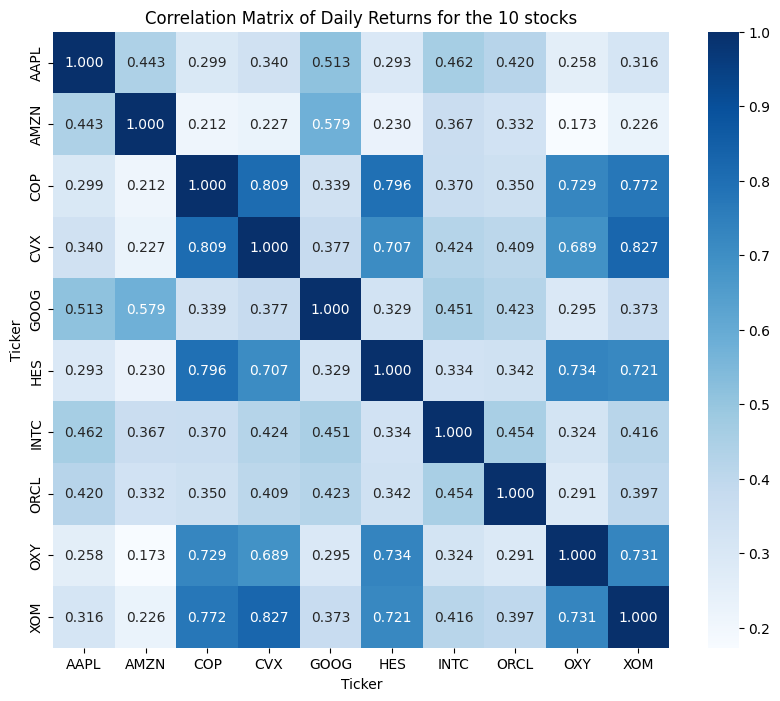

In [90]:
# Q3
#Import library for ploting
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate daily simple return
daily_returns_10 = data.pct_change().dropna()

# Compute correlation matrix of daily returns for the 10 stocks
corr_matrix = daily_returns_10.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='Blues', cbar=True, square=True)
plt.title("Correlation Matrix of Daily Returns for the 10 stocks")
plt.show()

In [91]:
# Q4
# Import library for KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
quart_price = data['2020-03-31':'2021-12-31']
quart_return = quart_price.resample('QE').ffill().pct_change().dropna()

# Scaling data
quart_return_Trans = quart_return.T
scaled_data = MinMaxScaler().fit_transform(quart_return_Trans)

# Create a K-means model with 2 clusters
kmeans = KMeans(n_clusters = 2, random_state = 12, max_iter = 1000)
quart_return_Trans['Cluster'] = kmeans.fit_predict(scaled_data)
quart_return_Trans['Cluster']

,Cluster
Ticker,
AAPL,0
AMZN,0
COP,1
CVX,1
GOOG,0
HES,1
INTC,1
ORCL,0
OXY,1


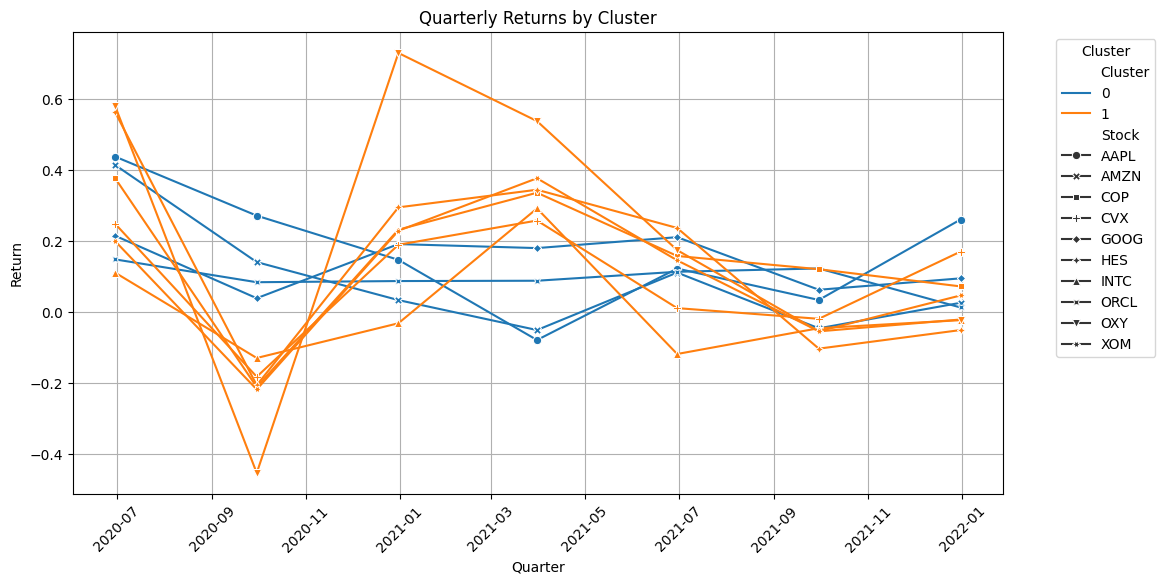

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt


# Add stock ticker as a column
quart_return_Trans['Stock'] = quart_return_Trans.index

# Reshape format for plotting
quarterly_returns_T = quart_return_Trans.melt(
    id_vars=['Stock', 'Cluster'],
    var_name='Quarter',
    value_name='Return'
)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=quarterly_returns_T,
    x='Quarter', y='Return',
    hue='Cluster', style='Stock',
    markers=True, dashes=False
)

# Formatting
plt.title("Quarterly Returns by Cluster")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Cluster")
plt.show()

In [93]:
# Q5
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Obtain 2021 data
price_2021 = data['2021-01-01':'2021-12-31']

# Compute daily returns
daily_return_2021 = price_2021.pct_change().dropna()

# Compute covariance matrix
Q = daily_return_2021.cov()


# Number of data
n = daily_return_2021.shape[1]


# Minimize variance subject to constraints
def portfolio_var(weights):
  port_var = np.sqrt(np.dot(weights.T, np.dot(Q, weights)) * 250)
  return port_var
# weight constraint
def weight_constraint (weights):
  return np.sum(weights) - 1
bounds_limit = [(0, 1)] * n
init = [1/n] * n
constraint = {'type': 'eq', 'fun': weight_constraint}

# Optimization
optimal_result = minimize(fun = portfolio_var, x0 = init,
                          bounds = bounds_limit,
                          constraints = constraint, method = 'SLSQP')

optimal_weights = pd.DataFrame(optimal_result['x'],
                               index = daily_return_2021.columns,
                               columns = ['Weight'])
optimal_weights


,Weight
Ticker,
AAPL,1.000309e-01
AMZN,2.764423e-01
COP,0.000000e+00
CVX,3.081521e-01
GOOG,8.386773e-02
HES,1.458252e-17
INTC,4.090753e-02
ORCL,1.905994e-01
OXY,3.252607e-18


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training for AAPL...
Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - loss: 0.0038
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 3.1293e-04
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 2.5259e-04
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 1.9420e-04
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 1.7710e-04
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 1.6886e-04
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 1.5746e-04
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 1.5243e-04
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 1.3323e-04
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 1.3638e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[*********************100%***********************]  4 of 4 completed

Training for AMZN...
Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - loss: 0.0094
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - loss: 8.6447e-04
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 7.2714e-04
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 7.4837e-04
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 5.0017e-04
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 5.5830e-04
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 5.1081e-04
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 5.5510e-04
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 5.2150e-04
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 3.0661e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[*********************100%***********************]  4 of 4 completed

Training for GOOG...



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 0.0085
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 7.5260e-04
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 4.5737e-04
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 4.3510e-04
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 3.6434e-04
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 4.1616e-04
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 3.2278e-04
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 3.2436e-04
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 2.8633e-04
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 3.4762e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[*********************100%***********************]  4 of 4 completed

Training for INTC...
Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - loss: 0.0275
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0017
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0018
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0016
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0015
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 0.0014
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.0014
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0013
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0012
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - loss: 0.0010
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[*********************100%***********************]  4 of 4 completed

Training for ORCL...
Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - loss: 0.0070
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - loss: 8.2529e-04
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 6.1159e-04
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 5.0704e-04
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 4.2966e-04
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 4.8437e-04
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 4.5550e-04
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 4.4813e-04
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 3.6922e-04
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 3.0883e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


[*********************100%***********************]  4 of 4 completed

Training for XOM...
Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - loss: 0.0609
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0048
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.0049
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0044
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 0.0051
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.0039
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 0.0034
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - loss: 0.0038
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.0039
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0033
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[*********************100%***********************]  4 of 4 completed

Training for CVX...
Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - loss: 0.0338
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0038
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0029
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0030
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 0.0028
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 0.0028
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0023
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0023
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0024
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0020
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


[*********************100%***********************]  4 of 4 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training for COP...
Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 79ms/step - loss: 0.0330
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0033
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0032
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 0.0025
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 0.0024
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - loss: 0.0022
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - loss: 0.0023
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0021
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0022
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0018
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


[*********************100%***********************]  4 of 4 completed

Training for HES...



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - loss: 0.0273
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0034
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.0036
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.0027
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.0028
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0027
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0021
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.0022
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 0.0020
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0019
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


[*********************100%***********************]  4 of 4 completed

Training for OXY...



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - loss: 0.0615
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 0.0059
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0056
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0054
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0038
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0038
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0036
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 0.0031
Epoch 9/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 0.0034
Epoch 10/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 0.0030
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


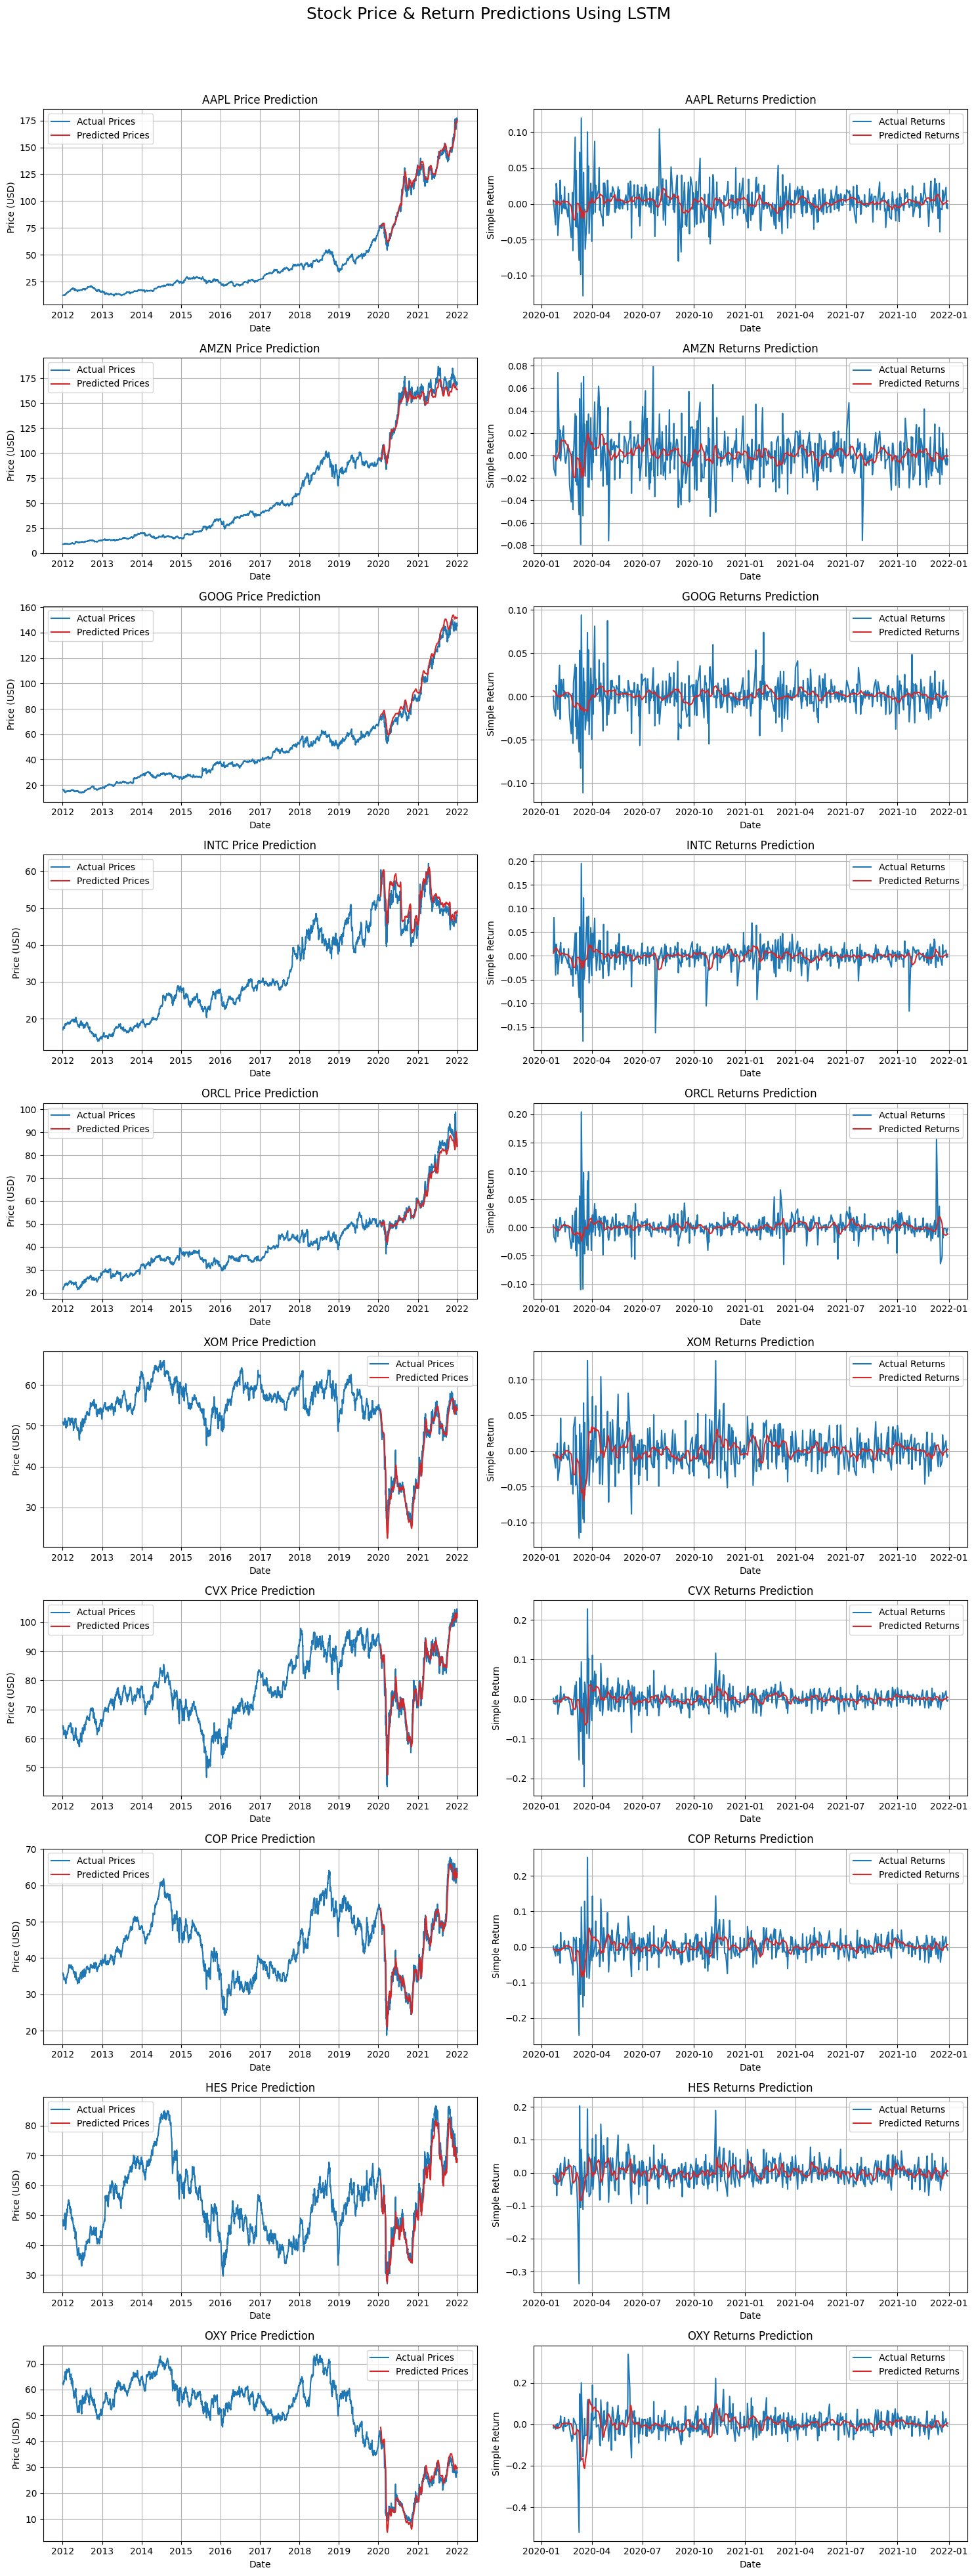


Model Performance Summary:
  Company      RMSE        R²
0    AAPL  4.323291  0.977251
1    AMZN  6.872889  0.922679
2    GOOG  5.377230  0.966400
3    INTC  3.074896  0.606888
4    ORCL  2.808182  0.966693
5     XOM  1.973771  0.956199
6     CVX  3.070481  0.940400
7     COP  2.102093  0.968219
8     HES  3.611735  0.949320
9     OXY  2.614715  0.892300

Feature Selection:
  Company                   Feature
0    AAPL        [AAPL, ^TNX, ^VIX]
1    AMZN  [AMZN, ^TNX, CL=F, ^VIX]
2    GOOG        [GOOG, ^TNX, CL=F]
3    INTC  [INTC, CL=F, ^TNX, ^VIX]
4    ORCL              [ORCL, ^TNX]
5     XOM   [XOM, ^TNX, ^VIX, CL=F]
6     CVX                     [CVX]
7     COP   [COP, ^TNX, CL=F, ^VIX]
8     HES               [HES, CL=F]
9     OXY   [OXY, ^TNX, ^VIX, CL=F]


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from sklearn.metrics import mean_squared_error, r2_score

company = ['AAPL','AMZN','GOOG','INTC','ORCL','XOM','CVX','COP','HES','OXY']
macro = ['^VIX','^TNX', 'CL=F']
features = []
results = []

# Create a figure for all plots
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(15, 40))
fig.suptitle("Stock Price & Return Predictions Using LSTM", fontsize=18)

for i, com in enumerate(company):
    data = yf.download([com] + macro, start="2012-01-01", end="2021-12-31")['Close'].dropna()

    print(f"Training for {com}...")

    # Feature selection
    corr_mat = data.corr()
    select_feature = corr_mat[com].abs().sort_values(ascending=False)
    final_feature = select_feature[select_feature > 0.3].index.tolist()
    features.append({'Company': com, 'Feature': final_feature})

    X_data = data[final_feature].dropna()

    # Separate scalers for price and macro features
    scaler_price = MinMaxScaler(feature_range=(0, 1))
    scaler_X = MinMaxScaler(feature_range=(0, 1))

    scaled_price = scaler_price.fit_transform(data[com].values.reshape(-1, 1))
    scaled_X = scaler_X.fit_transform(X_data)

    # Prepare sequences
    X, y = [], []
    seq_len = 60
    for j in range(len(scaled_X) - seq_len):
        X.append(scaled_X[j:j + seq_len])
        y.append(scaled_price[j + seq_len])

    X, y = np.array(X), np.array(y)

    # Train-test split (80% train, 20% test)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True, input_shape=(seq_len, X_train.shape[2])))
    model.add(Dropout(0.3))
    model.add(LSTM(units=128))
    model.add(Dropout(0.3))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=1)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Reshape before inverse transform
    y_pred = y_pred.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    # Convert predictions and actual prices back to original scale
    pred_price = scaler_price.inverse_transform(y_pred)
    act_price = scaler_price.inverse_transform(y_test)

    # Calculate simple returns
    act_return = (act_price[1:] / act_price[:-1]) - 1
    pred_return = (pred_price[1:] / pred_price[:-1]) - 1

    # Define test dates
    test_date = data.index[-len(y_test):]

    # Plot Price Prediction (Left Column)
    axes[i, 0].plot(data.index, data[com], label='Actual Prices', color='tab:blue')
    axes[i, 0].plot(test_date, pred_price.flatten(), label='Predicted Prices', color='tab:red')
    axes[i, 0].set_title(f'{com} Price Prediction')
    axes[i, 0].set_xlabel('Date')
    axes[i, 0].set_ylabel('Price (USD)')
    axes[i, 0].legend()
    axes[i, 0].grid(True)

    # Plot Returns Prediction (Right Column)
    axes[i, 1].plot(test_date[1:], act_return.flatten(), label='Actual Returns', color='tab:blue')
    axes[i, 1].plot(test_date[1:], pred_return.flatten(), label='Predicted Returns', color='tab:red')
    axes[i, 1].set_title(f'{com} Returns Prediction')
    axes[i, 1].set_xlabel('Date')
    axes[i, 1].set_ylabel('Simple Return')
    axes[i, 1].legend()
    axes[i, 1].grid(True)

    # Calculate RMSE and R²
    rmse = np.sqrt(mean_squared_error(act_price, pred_price))
    r2 = r2_score(act_price.flatten(), pred_price.flatten())

    results.append({'Company': com, 'RMSE': rmse, 'R²': r2})

# Adjust layout to fit title and subplots properly
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print performance summary
results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)

# Print feature selection
features_df = pd.DataFrame(features)
print("\nFeature Selection:")
print(features_df)
